# 第6章 教師あり学習：分類（1）
## 6.1 1次元入力2クラス分類

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


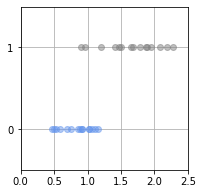

In [2]:
# リスト 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# データ生成 -----------------------------------
np.random.seed(seed=0) # 乱数を固定
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n)   # 入力データ
T = np.zeros(X_n, dtype=np.uint8)   # 目標データ
Dist_s = [0.4, 0.8] # 分布の開始地点
Dist_w = [0.8, 1.6] # 分布の幅
Pi = 0.5 # クラス0の比率
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]
# データの表示 ---------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

# リスト 6-1-(2)
# データ分布表示 -------------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K):
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5, linestyle='none', marker='o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0, 1])

# メイン
flg = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

1.25

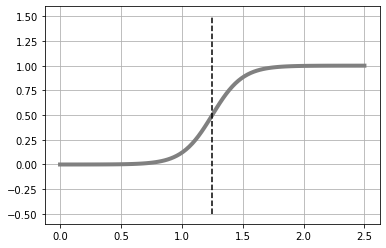

In [3]:
# リスト 6-1-(3)
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

# リスト 6-1-(4)
def show_logistic(w):
    xb= np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 決定境界
    i = np.min(np.where(y > 0.5))
    B = (xb[i - 1] + xb[i]) / 2
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B

# test
W = [8, -10]
show_logistic(W)

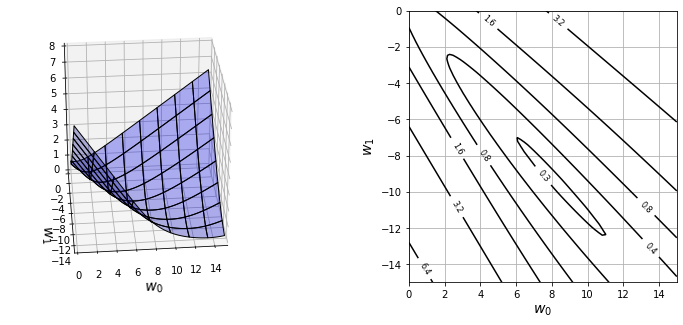

In [4]:
# リスト 6-1-(5)
# 平均交差エントロビー誤差 ----------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

# test
W = [1, 1]
cee_logistic(W, X, T)

# リスト 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 計算 ----------------------------------------
xn = 80 # 等高線表示の解像度
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

# 表示 ----------------------------------------
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black', rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black', levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


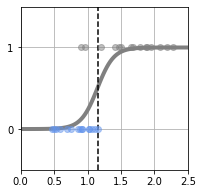

In [5]:
# リスト 6-1-(7)
# 平均交差エントロピー誤差 の微分 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# test
W=[1, 1]
dcee_logistic(W, X, T)

# リスト 6-1-(8)
from scipy.optimize import minimize

# パラメータサーチ
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), jac=dcee_logistic, method='CG')
    return res1.x

# メイン ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print('w0 = {0:.2f}, w1 = {1:.2f}'.format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print('CEE = {0:.2f}'.format(cee))
print('Boundary = {0:.2f} g'.format(B))
plt.show()